📊 Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.9737
Recall: 0.9737
F1-score: 0.9736

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



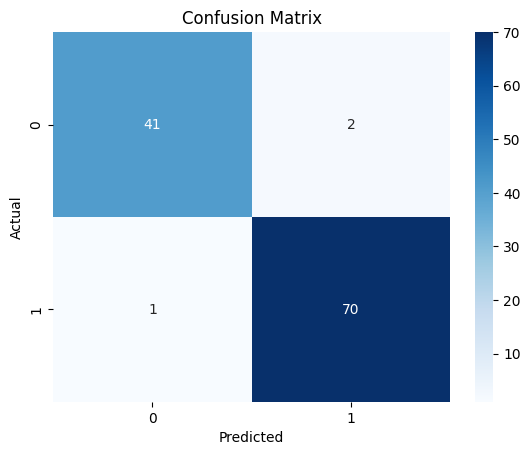

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Data Loading Module
# ---------------------------
def load_data(path=None):
    """
    Load dataset (CSV or sklearn sample).
    If no path is given, loads sklearn breast cancer dataset.
    """
    if path:
        df = pd.read_csv(path)
        return df
    else:
        from sklearn.datasets import load_breast_cancer
        data = load_breast_cancer(as_frame=True)
        df = data.frame
        return df

# ---------------------------
# Preprocessing Module
# ---------------------------
def preprocess(df, target_column="target"):
    """
    Handle missing values, encode categorical, scale numerical, split dataset.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Identify categorical & numeric columns
    cat_cols = X.select_dtypes(include=['object', 'category']).columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipeline
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols)
        ]
    )

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessor

# ---------------------------
# Model Training Module
# ---------------------------
def train_model(X_train, y_train, preprocessor):
    """
    Train a Logistic Regression model inside a pipeline.
    """
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42, max_iter=500))
    ])
    model.fit(X_train, y_train)
    return model

# ---------------------------
# Evaluation Module
# ---------------------------
def evaluate_model(model, X_test, y_test):
    """
    Evaluate trained model with metrics and plots.
    """
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print("📊 Evaluation Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ---------------------------
# Main Function
# ---------------------------
def main():
    df = load_data()  # Or pass your CSV path here
    X_train, X_test, y_train, y_test, preprocessor = preprocess(df, target_column="target")
    model = train_model(X_train, y_train, preprocessor)
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    main()
